In [ ]:
!pip install TensorFlow 
!pip install Keras 
!pip install numpy 
!pip install matplotlib 

In [ ]:
import tensorflow as tf 
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D 
from keras.layers import Dense,Activation,Dropout,Flatten 
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np 
import matplotlib.pyplot as plt 
import csv,tarfile 
from keras.datasets import cifar10 
from keras.constraints import maxnorm 
from keras.optimizers import SGD 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils 

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

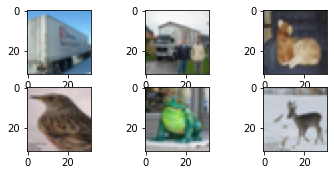

In [ ]:
plt.subplot(331) 
plt.imshow(X_train[15]) 
plt.subplot(332) 
plt.imshow(X_train[16]) 
plt.subplot(333) 
plt.imshow(X_train[17]) 
plt.subplot(334) 
plt.imshow(X_train[18]) 
plt.subplot(335) 
plt.imshow(X_train[19]) 
plt.subplot(336) 
plt.imshow(X_train[20]) # show the plot plt.show() 

(<matplotlib.image.AxesImage at 0x7fc741d85e80>, array([4], dtype=uint8))

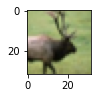

In [ ]:
y_train[15], y_train[16], y_train[17], y_train[18], y_train[19], y_train[20]  
i=34 
plt.subplot(331) 
plt.imshow (X_train[i]), y_train[i]  

In [ ]:
seed = 7 
np.random.seed(seed) 

In [ ]:
X_predict = np.random.random((6,32,32, 3)) 
X_predict[0] = X_test[15] 
X_predict[1] = X_test[16] 
X_predict[2] = X_test[17] 
X_predict[3] = X_test[18] 
X_predict[4] = X_test[19] 
X_predict[5] = X_test[20]
X_predict.shape, X_predict[1]   

((6, 32, 32, 3), array([[[ 95.,  76.,  78.],
         [ 92.,  77.,  78.],
         [ 89.,  77.,  77.],
         ...,
         [ 30.,  28.,  38.],
         [175., 183., 191.],
         [225., 234., 240.]],
 
        [[ 90.,  71.,  73.],
         [ 86.,  72.,  72.],
         [ 83.,  71.,  71.],
         ...,
         [  0.,   0.,  13.],
         [ 60.,  63.,  79.],
         [165., 171., 189.]],
 
        [[ 88.,  69.,  71.],
         [ 84.,  70.,  70.],
         [ 82.,  70.,  70.],
         ...,
         [  5.,   0.,  12.],
         [ 24.,  26.,  48.],
         [127., 139., 165.]],
 
        ...,
 
        [[203., 176., 161.],
         [213., 175., 156.],
         [202., 165., 155.],
         ...,
         [182., 183., 189.],
         [118., 120., 125.],
         [ 37.,  32.,  46.]],
 
        [[123.,  94.,  90.],
         [210., 170., 157.],
         [211., 171., 160.],
         ...,
         [116., 116., 120.],
         [ 44.,  45.,  47.],
         [ 11.,   3.,  15.]],
 
        [[102.

In [ ]:
X_train=X_train.astype('float32') 
X_test=X_test.astype('float32') 
X_train=X_train/255.0 
X_test=X_test/255.0 
X_predict=X_predict/255.0  

In [ ]:
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1] 

In [ ]:
model = Sequential() 
model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))  # model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax')) 

In [ ]:
epochs = 1 
lrate = 0.01 
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=500)  

Epoch 1/10
100/100 [==============================] - 97s 957ms/step - loss: 1.9807 - accuracy: 0.2833
Epoch 2/10
100/100 [==============================] - 92s 925ms/step - loss: 1.4192 - accuracy: 0.4927
Epoch 3/10
100/100 [==============================] - 92s 917ms/step - loss: 1.2746 - accuracy: 0.5533
Epoch 4/10
100/100 [==============================] - 91s 906ms/step - loss: 1.1555 - accuracy: 0.5958
Epoch 5/10
100/100 [==============================] - 91s 906ms/step - loss: 1.0792 - accuracy: 0.6217
Epoch 6/10
100/100 [==============================] - 92s 920ms/step - loss: 1.0188 - accuracy: 0.6481
Epoch 7/10
100/100 [==============================] - 89s 891ms/step - loss: 0.9664 - accuracy: 0.6663
Epoch 8/10
100/100 [==============================] - 90s 895ms/step - loss: 0.9419 - accuracy: 0.6730
Epoch 9/10
100/100 [==============================] - 93s 933ms/step - loss: 0.8947 - accuracy: 0.6896
Epoch 10/10
100/100 [==============================] - 88s 880ms/step - l

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))  

Accuracy: 66.68%


In [ ]:
predictions = model.predict(X_predict) 
predictions 
  

array([[2.02947464e-02, 3.47737106e-03, 3.45528708e-03, 1.03766173e-01,
        1.00433126e-01, 1.10949073e-02, 3.11256111e-01, 9.96670788e-05,
        4.44874555e-01, 1.24809379e-03],
       [2.27444776e-04, 9.10200819e-04, 1.85812451e-02, 8.29463080e-02,
        3.33713717e-04, 8.67449045e-01, 3.90508631e-03, 2.33375244e-02,
        8.89726740e-04, 1.41965493e-03],
       [1.76835265e-02, 1.26212463e-03, 2.86686867e-02, 2.45862275e-01,
        5.55376038e-02, 3.37930590e-01, 3.78591358e-03, 1.76504552e-01,
        1.13904756e-02, 1.21374235e-01],
       [1.00203622e-02, 8.13347008e-03, 1.20876350e-04, 1.98546069e-04,
        2.36686072e-04, 4.14619863e-05, 4.69375300e-05, 1.02717313e-04,
        9.63788509e-01, 1.73104294e-02],
       [1.03314036e-04, 1.13000366e-04, 5.45171164e-02, 1.65363736e-02,
        4.52834606e-01, 8.86242278e-03, 4.60513711e-01, 6.40176609e-03,
        2.30467194e-05, 9.46570435e-05],
       [7.76979886e-03, 9.32589397e-02, 1.42792026e-02, 1.25935733e-01,
   

In [ ]:
rounded = np.round(predictions) 
print(rounded) 


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
rounded = np.round(predictions,2) 
print(rounded)

[[0.02 0.   0.   0.1  0.1  0.01 0.31 0.   0.44 0.  ]
 [0.   0.   0.02 0.08 0.   0.87 0.   0.02 0.   0.  ]
 [0.02 0.   0.03 0.25 0.06 0.34 0.   0.18 0.01 0.12]
 [0.01 0.01 0.   0.   0.   0.   0.   0.   0.96 0.02]
 [0.   0.   0.05 0.02 0.45 0.01 0.46 0.01 0.   0.  ]
 [0.01 0.09 0.01 0.13 0.19 0.03 0.   0.51 0.   0.03]]


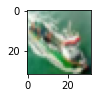

In [ ]:
i=0
plt.subplot(331)
plt.imshow(X_predict[i])

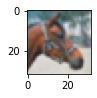

In [ ]:
i=2
plt.subplot(331)
plt.imshow(X_predict[i])

In [ ]:
predictions = model.predict(X_predict) 
predictions 
rounded = np.round(predictions) 
print(rounded) 


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


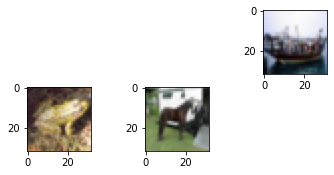

In [ ]:
i=3
plt.subplot(333)
plt.imshow(X_predict[i])
i=4
plt.subplot(334)
plt.imshow(X_predict[i])
i=5
plt.subplot(335)
plt.imshow(X_predict[i])

In [ ]:
def display_objts(imgpred):   
  objects = ('Airplane','Automobile','bird','cat','deer', 'dog', 'frog','horse','ship','truck')   
  y_pos = np.arange(len(objects))          

  plt.bar(y_pos, imgpred, align='center', alpha=0.75)     
  plt.xticks(y_pos, objects)     
  plt.ylabel('percentage')     
  plt.title('objects')          
  
  plt.show()  

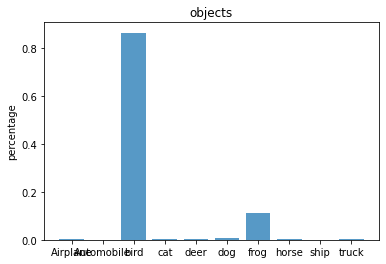

In [ ]:
img = image.load_img("/content/bird.jpg", target_size=(32,32))   
x = image.img_to_array(img)   
x = np.expand_dims(x, axis = 0)   
x /= 255   
custom = model.predict(x)   #custom = np.round(custom) 
display_objts(custom[0])  


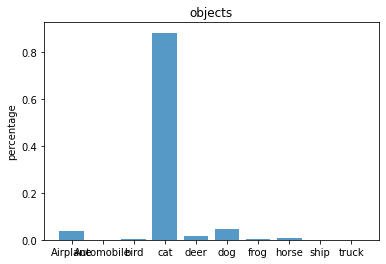

In [ ]:
img = image.load_img("/content/cat.jpg", target_size=(32,32))   
x = image.img_to_array(img)   
x = np.expand_dims(x, axis = 0)   
x /= 255   
custom = model.predict(x)   #custom = np.round(custom) 
display_objts(custom[0])  


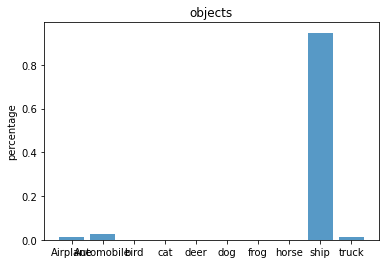

In [ ]:
img = image.load_img("/content/ship1.jpg", target_size=(32,32))   
x = image.img_to_array(img)   
x = np.expand_dims(x, axis = 0)   
x /= 255   
custom = model.predict(x)   
#custom = np.round(custom) 
display_objts(custom[0])  


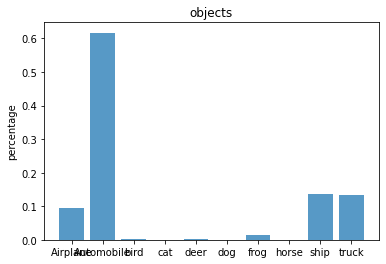

In [ ]:
img = image.load_img("/content/ship2.jpg", target_size=(32,32))   
x = image.img_to_array(img)   
x = np.expand_dims(x, axis = 0)   
x /= 255   
custom = model.predict(x)   #custom = np.round(custom) 
display_objts(custom[0])  